In [1]:
import pandas as pd #For tabular Data & for 2D array
import numpy as np #For numerical Data & For multi dimensional array

In [2]:
#Keras for Developing Evaluating Deep learning Models
from keras.models import Sequential 
from keras.layers import Dense

In [3]:
from sklearn.preprocessing import StandardScaler  #To rescale the data to have mean of 0 and std as 1
from sklearn.model_selection import train_test_split #For splitting data to test and evaluate 
from sklearn.metrics import mean_squared_error,mean_absolute_error #Used to evaluate regression problem accuracy

In [4]:
import seaborn as sns #For making statistical graphs
import matplotlib.pyplot as plt #For plotting 

In [5]:
import os #Finding the directory 
os.getcwd()

'C:\\Users\\Asus\\Downloads\\Deep Learning'

READ THE DATA

In [6]:
dataframe=pd.read_csv('C:/Users/Asus/Downloads/Data/california_housing_test.csv')
dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


FEATURE ENGINEERING

In [8]:
dataframe['rooms_per_household']=dataframe['total_rooms']/dataframe['households']
dataframe['bedrooms_per_room']=dataframe['total_bedrooms']/dataframe['total_rooms']
dataframe['total_population_per_household']=dataframe['population']/dataframe['households']

In [9]:
dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,total_population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


DROPPING NON INFORMATIVE COLUMN'S

In [10]:
df=dataframe.drop(['longitude','latitude','ocean_proximity'],axis=1)
df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,total_population_per_household
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,5.045455,0.224625,2.560606
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,6.114035,0.215208,3.122807
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,5.205543,0.215173,2.325635
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,5.329513,0.219892,2.123209


CHECKING LINEAR ASSOCIATION WITH CORRELATION COEFFICIENTS 

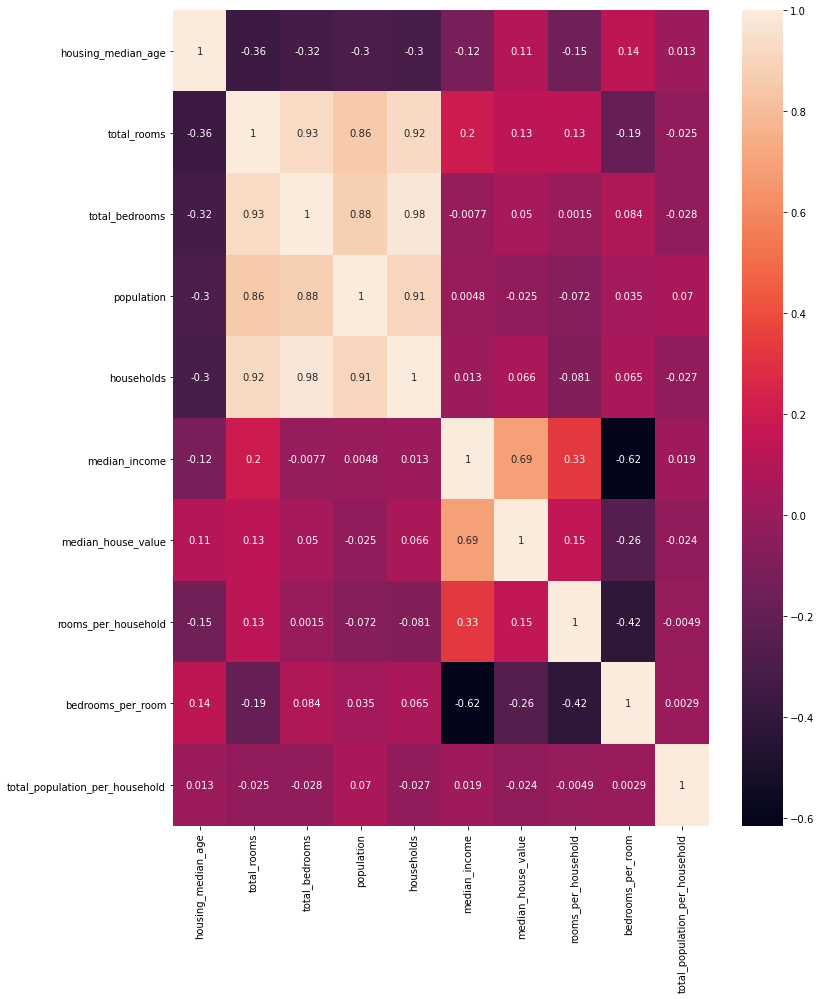

In [11]:
plt.figure(figsize=(12,15))
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

READING DATA AND TARGET IN NUMPY ARRAYS

In [12]:
#Splitting into input(X) and output(Y) variables
X=df.drop('median_house_value',axis=1)
y=df['median_house_value']

In [13]:
X

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,total_population_per_household
0,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,0.146591,2.555556
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,0.155797,2.109842
2,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,0.129516,2.802260
3,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,0.184458,2.547945
4,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,5.045455,0.224625,2.560606
20636,18.0,697.0,150.0,356.0,114.0,2.5568,6.114035,0.215208,3.122807
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,5.205543,0.215173,2.325635
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,5.329513,0.219892,2.123209


In [14]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

RESCALING TARGET TO MINIMIZE THE DEGREE OF VARIABLE

In [15]:
#Predicted selling price p will be inpertreted as p x 1000 USD.
y=y/1000
y

0        452.6
1        358.5
2        352.1
3        341.3
4        342.2
         ...  
20635     78.1
20636     77.1
20637     92.3
20638     84.7
20639     89.4
Name: median_house_value, Length: 20640, dtype: float64

BUILDING A DEEP ARTIFICIAL NEURAL NETWORKK (ANN) WITH KERAS SEQUENTIAL API

In [16]:
#Define ANN model
def ANN_model(input_size):
    model=Sequential()
    model.add(Dense(512,input_dim=input_size,kernel_initializer='normal',activation='tanh'))
    model.add(Dense(128,kernel_initializer='normal',activation='tanh'))
    model.add(Dense(64,kernel_initializer='normal',activation='sigmoid'))
    model.add(Dense(32,kernel_initializer='normal',activation='relu'))
    model.add(Dense(1,kernel_initializer='normal',activation='linear'))
#Compile Model
    model.compile(loss='mean_squared_error',optimizer='adam',metrics='mse')
    return model

array([[<AxesSubplot:title={'center':'housing_median_age'}>,
        <AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>],
       [<AxesSubplot:title={'center':'rooms_per_household'}>,
        <AxesSubplot:title={'center':'bedrooms_per_room'}>,
        <AxesSubplot:title={'center':'total_population_per_household'}>]],
      dtype=object)

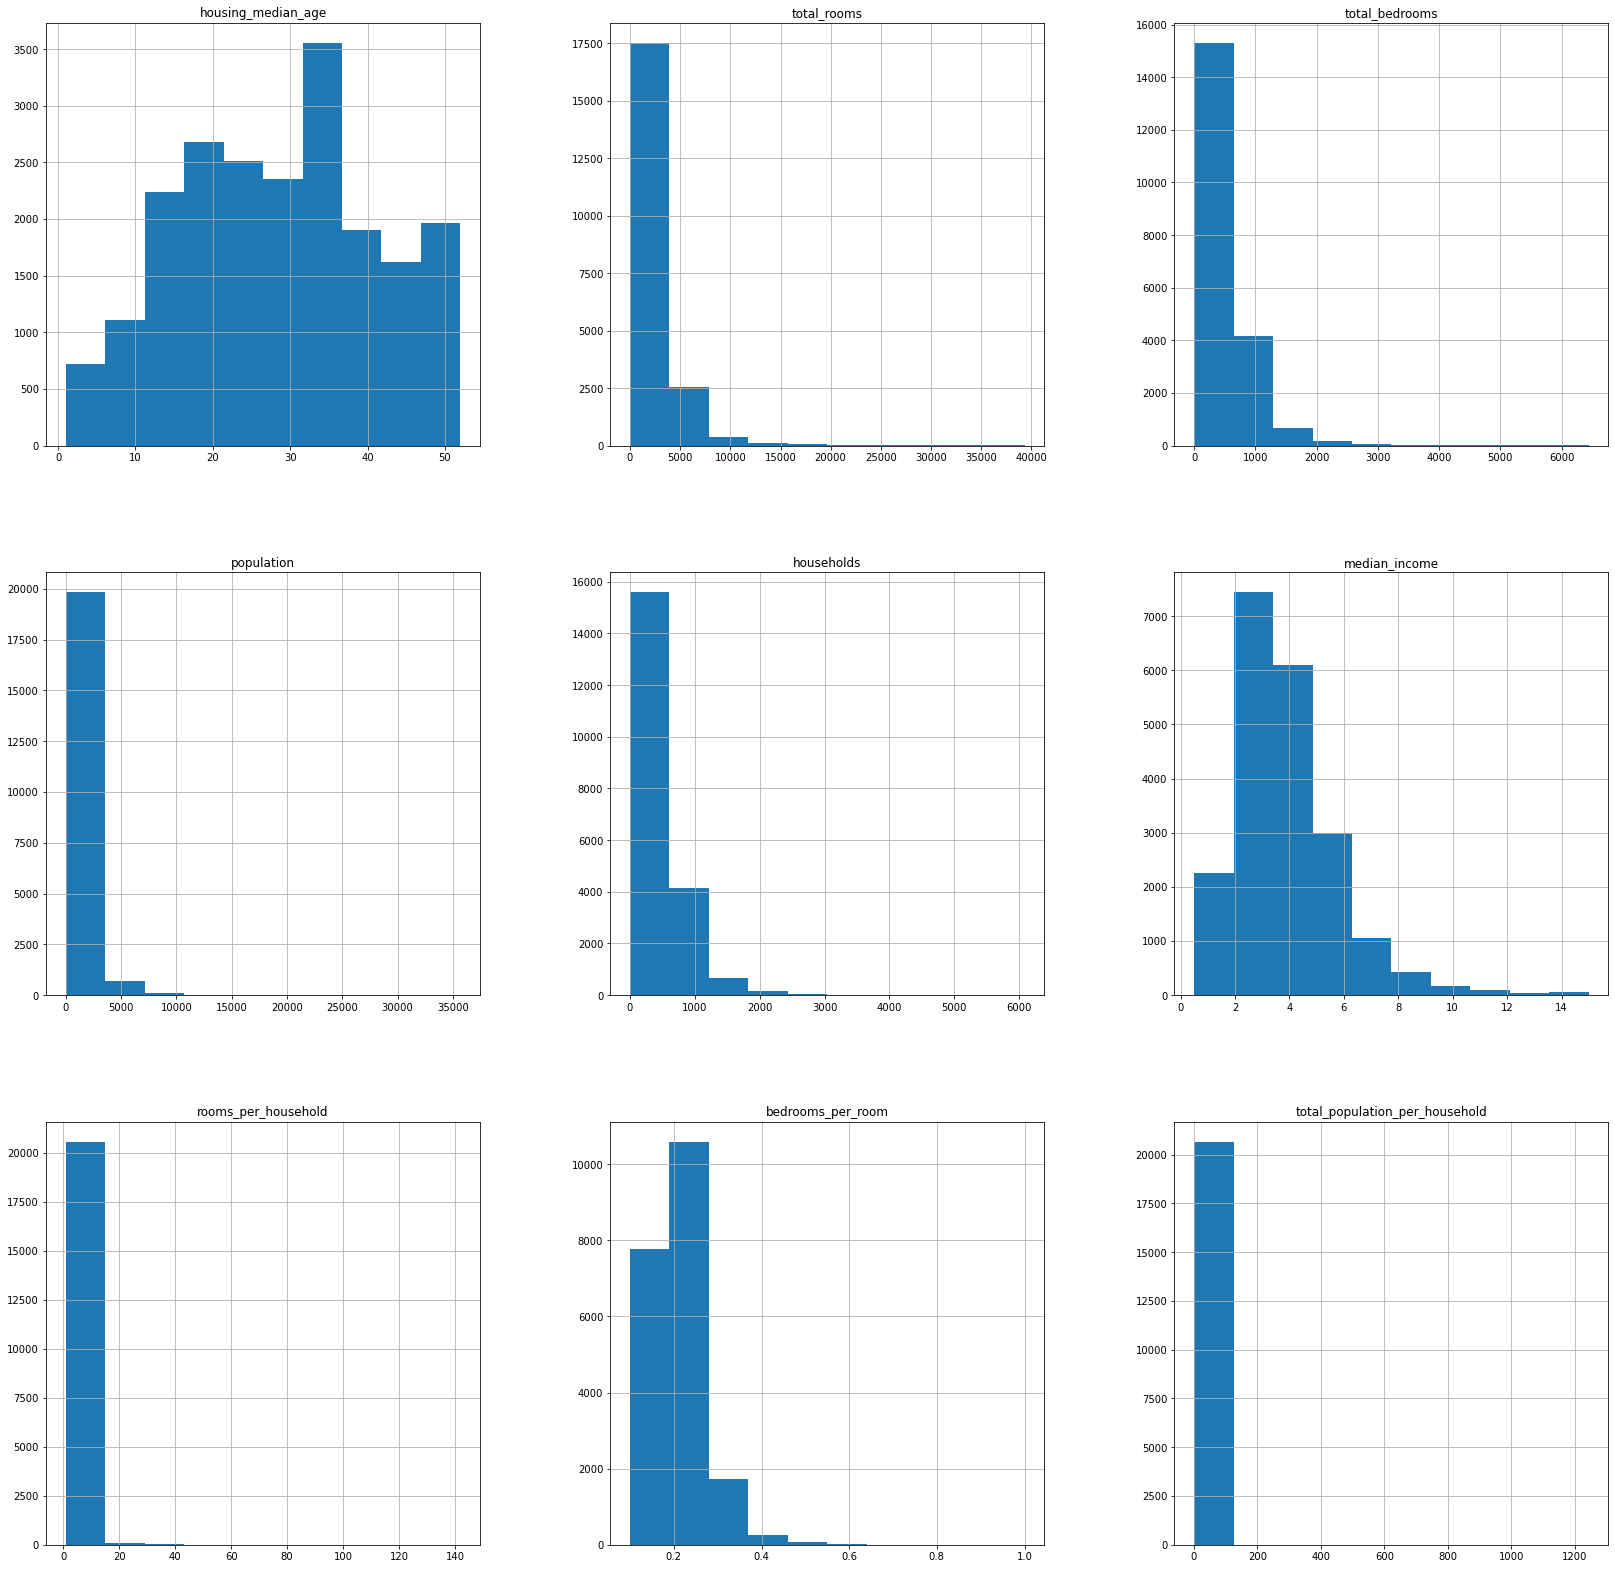

In [20]:
#Data with NAN's
X.hist(figsize=(28,28))

array([[<AxesSubplot:xlabel='housing_median_age', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='total_bedrooms', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='population', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='households', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_income', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='rooms_per_household', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='bedrooms_per_room', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='total_population_per_household', ylabel='housing_median_age'>],
       [<AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_bedrooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='population', ylabel='total_rooms'>,
        <AxesSubplot:xlabe

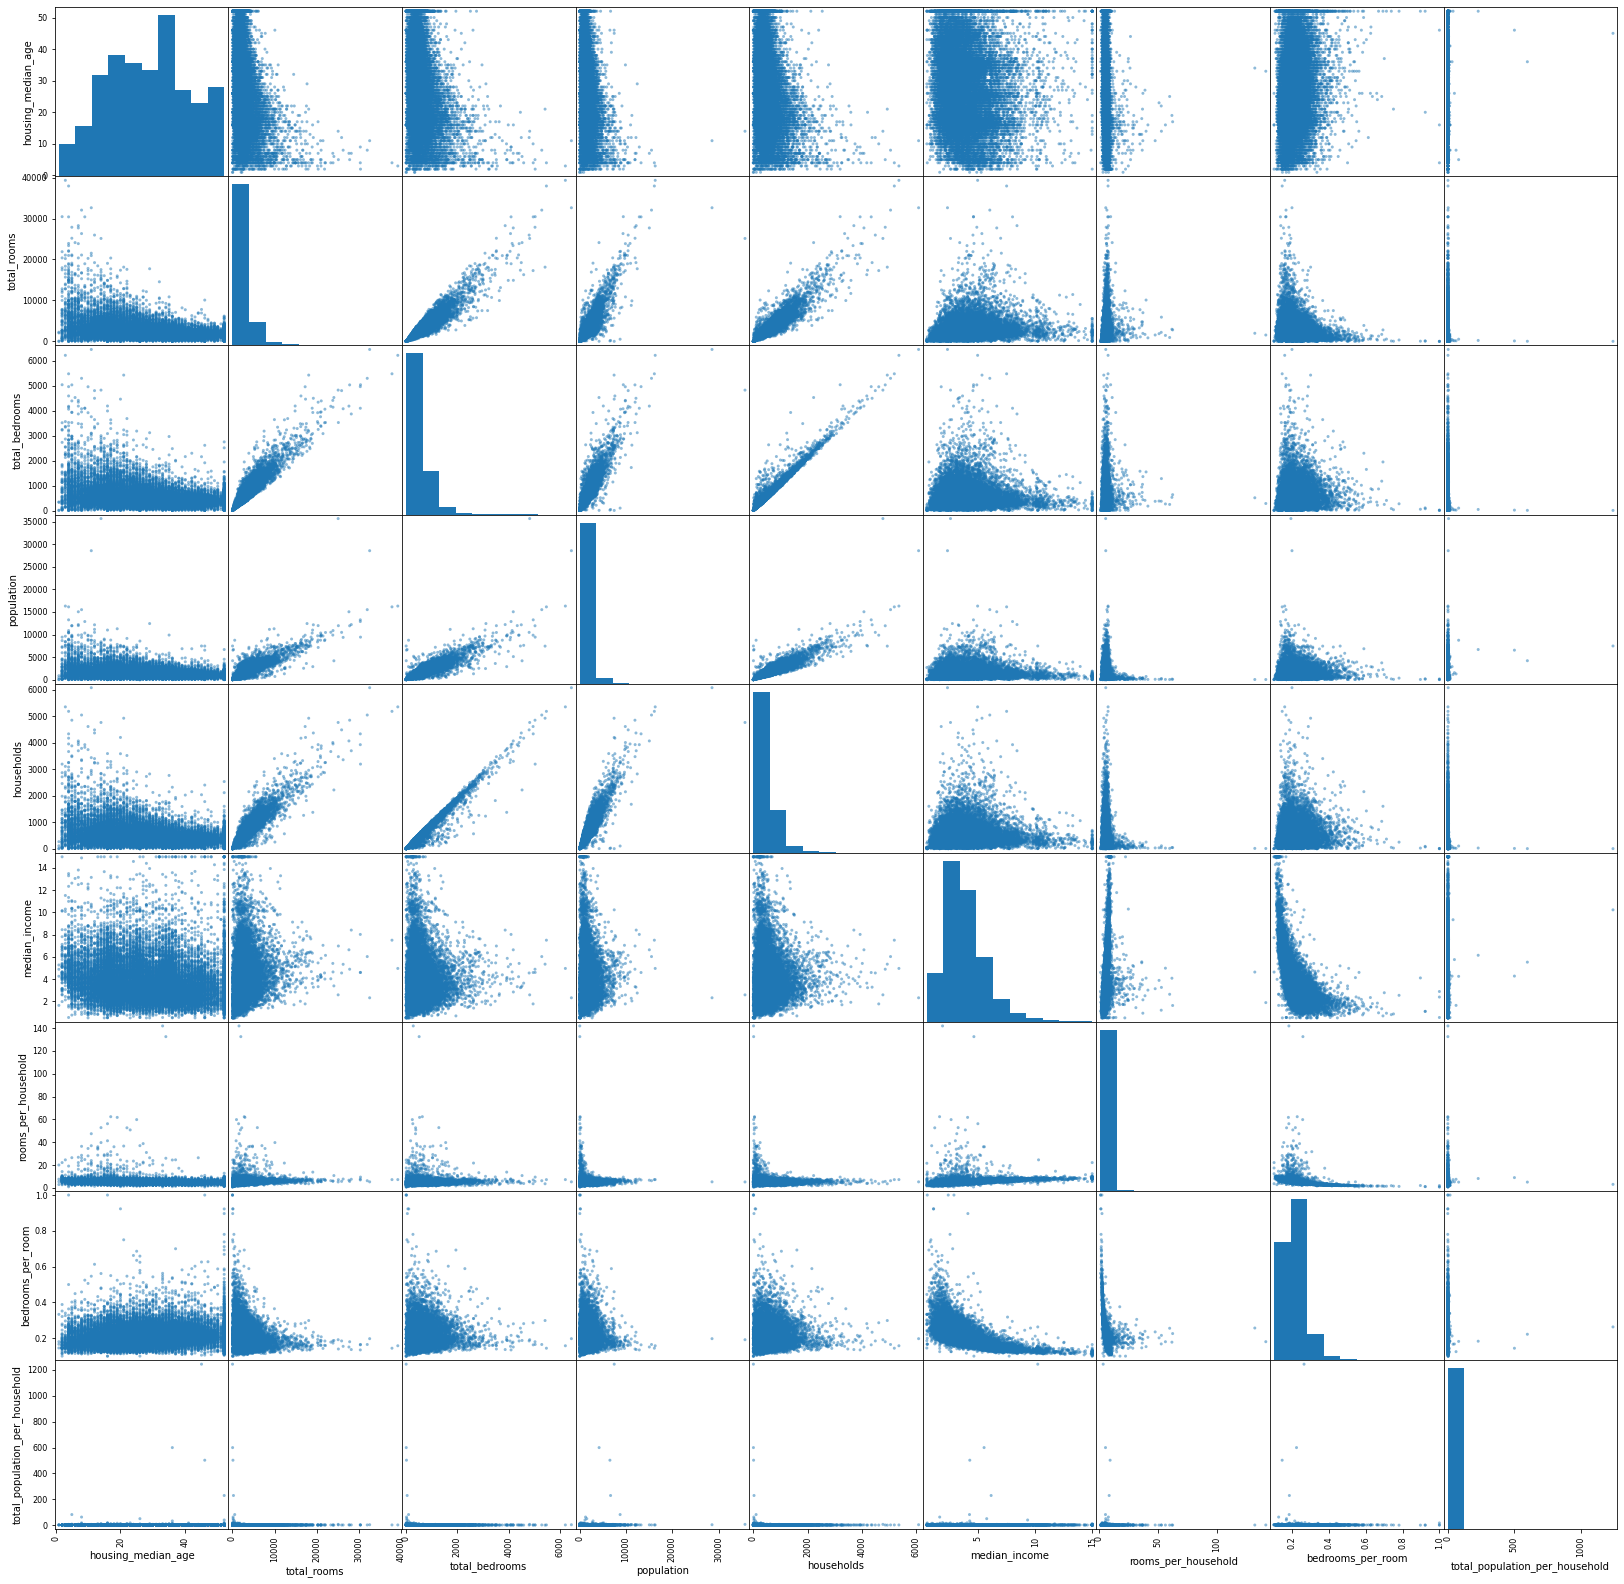

In [21]:
from pandas.plotting import scatter_matrix
scatter_matrix(X,figsize=(28,28))

In [19]:
X.isnull().sum() #Checking for NA values in data

housing_median_age                  0
total_rooms                         0
total_bedrooms                    207
population                          0
households                          0
median_income                       0
rooms_per_household                 0
bedrooms_per_room                 207
total_population_per_household      0
dtype: int64

In [25]:
#Replacing NA's with Mean 
X['total_bedrooms'].fillna(int(X['total_bedrooms'].mean()),inplace=True)
X['bedrooms_per_room'].fillna(int(X['bedrooms_per_room'].mean()),inplace=True)

In [26]:
X.isnull().sum()

housing_median_age                0
total_rooms                       0
total_bedrooms                    0
population                        0
households                        0
median_income                     0
rooms_per_household               0
bedrooms_per_room                 0
total_population_per_household    0
dtype: int64

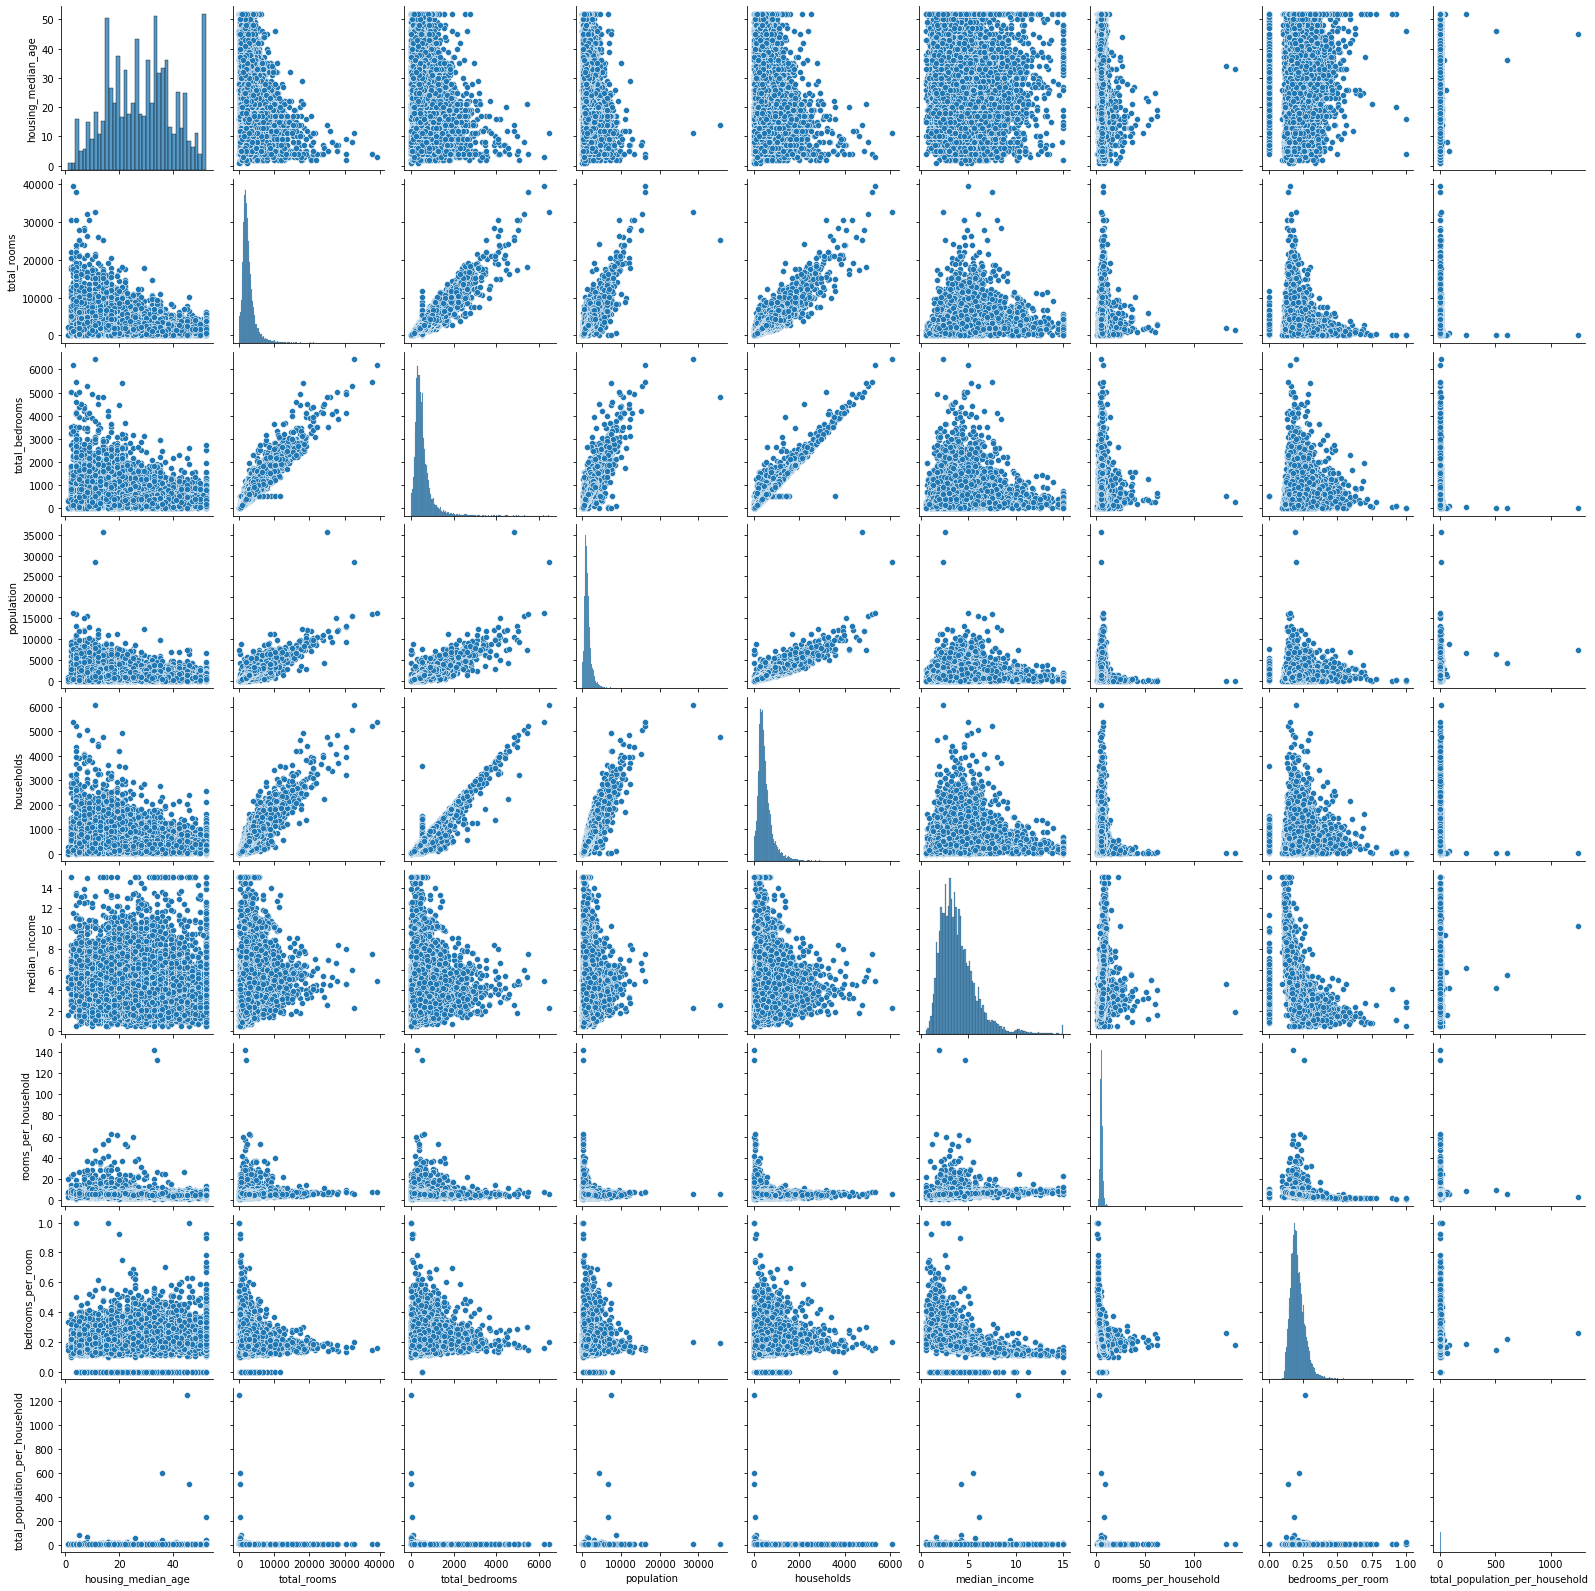

In [28]:
#Plotting of clean data after removing nan
p=sns.pairplot(X)

SPLIT DATA INTO TRAIN AND TEST

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,shuffle=True,random_state=123)

FEATURE SCALING

In [30]:
# evaluate model with standardized dataset
sd=StandardScaler()
sd.fit(X_train)
X_train_std=sd.transform(X_train)
X_test_std=sd.transform(X_test)

BUILD AN ANN OBJECT

In [31]:
input_dim=X.shape[1]
model=ANN_model(input_dim)

CHECKING SUMMARY OF MODEL

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               5120      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 81,153
Trainable params: 81,153
Non-trainable params: 0
_________________________________________________________________


TRAIN THE MODEL

In [33]:
history=model.fit(X_train_std,y_train,validation_data=(X_test_std,y_test),epochs=100,batch_size=178)

Epoch 1/100
82/82 [==============================] - 2s 12ms/step - loss: 54942.3136 - mse: 54942.3136 - val_loss: 48217.2969 - val_mse: 48217.2969
Epoch 2/100
82/82 [==============================] - 1s 7ms/step - loss: 44055.6327 - mse: 44055.6327 - val_loss: 29186.0820 - val_mse: 29186.0820
Epoch 3/100
82/82 [==============================] - ETA: 0s - loss: 25650.7919 - mse: 25650.791 - 1s 7ms/step - loss: 25483.3734 - mse: 25483.3734 - val_loss: 15925.7285 - val_mse: 15925.7285
Epoch 4/100
82/82 [==============================] - 1s 8ms/step - loss: 14910.9696 - mse: 14910.9697 - val_loss: 13307.6006 - val_mse: 13307.6006
Epoch 5/100
82/82 [==============================] - 1s 7ms/step - loss: 13262.3173 - mse: 13262.3173 - val_loss: 13219.4268 - val_mse: 13219.4268
Epoch 6/100
82/82 [==============================] - 1s 10ms/step - loss: 12185.7028 - mse: 12185.7034 - val_loss: 8204.1270 - val_mse: 8204.1270
Epoch 7/100
82/82 [==============================] - 1s 13ms/step - loss

LOSS CURVE DISPLAY 

In [34]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

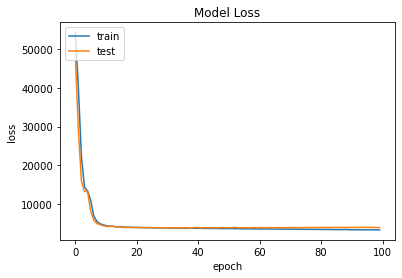

In [36]:
# Summarize History for the Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Model Loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [38]:
predictions=model.predict(X_test_std)
mae=mean_absolute_error(y_test,predictions)
print('\n MAE:{}'.format(mae))

rmse=np.sqrt(mean_squared_error(y_test,predictions))
print('\n RMSE:{}'.format(rmse))


 MAE:45.10920640896149

 RMSE:63.643251564646675
